In [2]:
import pandas as pd
import statsmodels.api as sm

In [3]:
important_cols = ['PRCP_US1UTWS0009',
 'TMIN_USC00421918',
 'TMAX_USC00421918',
 'TMAX_USC00422294',
 'TMIN_USC00424846',
 'TMAX_USC00424846',
 'TMIN_USC00425705',
 'TMIN_USC00427255',
 'PRCP_USC00428668',
 'TMIN_USC00428741',
 'TMAX_USC00428741',
 'TMIN_USC00428939',
 'TMIN_USC00429133',
 'TMAX_USC00429133',
 'SNOW_USW00024126',
 'TMIN_USW00024126']
df = pd.read_csv("GSL_monthly.csv", index_col=0)
df

,PRCP,SNOW,SNWD,PRCP_US1UTBE0002,SNOW_US1UTBE0002,SNWD_US1UTBE0002,PRCP_US1UTBE0003,SNOW_US1UTBE0003,SNWD_US1UTBE0003,PRCP_US1UTBE0004,...,TMIN_USW00024193,TMAX_USW00024193,PRCP_USW00053167,TMIN_USW00053167,TMAX_USW00053167,PRCP_USW00094097,SNWD_USW00094097,TMIN_USW00094097,TMAX_USW00094097,depth
1893-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4201.700000
1893-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4201.900000
1893-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202.000000
1893-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202.400000
1893-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,12.200000,3.080000,51.00,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.966667,NaN,-50.566667,92.800000,4192.176667
2020-12,7.612903,6.161290,45.70,7.785714,8.25,120.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.096774,NaN,-124.096774,4.419355,4192.190323
2021-01,12.483871,5.928571,42.75,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.483871,NaN,-102.677419,4.935484,4192.303571
2021-02,0.000000,0.000000,NaN,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.214286,NaN,-55.964286,33.107143,NaN


<AxesSubplot:>

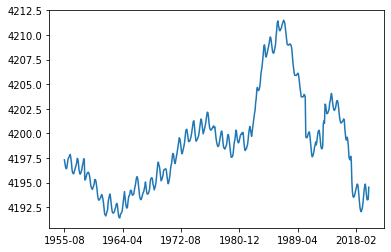

In [13]:
df = df[important_cols + ['depth']].dropna()
df.depth.plot()

In [14]:
# Split train and test
split_index = int(len(df) *.7)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In [15]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth'))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     50.69
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           8.94e-81
Time:                        19:58:01   Log-Likelihood:                -832.91
No. Observations:                 366   AIC:                             1700.
Df Residuals:                     349   BIC:                             1766.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4185.3869      1.723   2428.986      0.000    4181.998    4188.776
PRCP_US1UTWS0009     0.0488      0.027      1.827      0.069      -0.004       0.101
TMIN_USC00421918     0.0035      0.014      0.242      0.809      -0.025       0.032
TMAX_USC00421918     0.0266      0.018      1.450      0.148      -0.009       0.063
TMAX_USC00422294    -0.1717      0.022     -7.872      0.000      -0.215      -0.129
TMIN_USC00424846     0.0254      0.011      2.341      0.020       0.004       0.047
TMAX_USC00424846    -0.0675      0.016     -4.245      0.000      -0.099      -0.036
TMIN_USC00425705     0.0049      0.015      0.330      0.742      -0.025       0.034
TMIN_USC00427255    -0.0268      0.014     -1.921      0.056      -0.054       0.001
PRCP_USC00428668    -0.0301      0.019     -1.604      0.110      -0.067       0.007
TMIN_USC00428741    -0.1822      0.020     -9.049      0.000      -0.222      -0.143
TMAX_USC00428741     0.1330      0.018      7.522      0.000       0.098       0.168
TMIN_USC00428939    -0.0474      0.015     -3.203      0.001      -0.077      -0.018
TMIN_USC00429133    -0.0648      0.014     -4.671      0.000      -0.092      -0.038
TMAX_USC00429133     0.1442      0.020      7.187      0.000       0.105       0.184
SNOW_USW00024126     0.0169      0.028      0.594      0.553      -0.039       0.073
TMIN_USW00024126     0.2215      0.015     15.171      0.000       0.193       0.250
==============================================================================
Omnibus:                       47.726   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.553
Skew:                           0.743   Prob(JB):                     5.90e-20
Kurtosis:                       4.897   Cond. No.                     5.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:title={'center':'OLS Predictions. BIC = 1021'}, xlabel='Dates', ylabel='Lake Depth (ft)'>

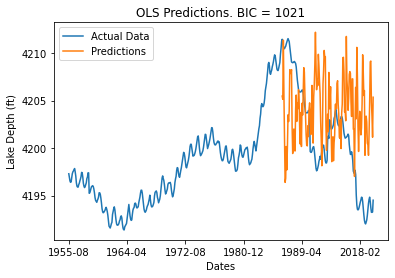

In [16]:
predictions = model.predict(sm.add_constant(test[important_cols]))
filled_predictions = df.depth.copy()
filled_predictions[:-len(predictions)] = None
filled_predictions[-len(predictions):] = predictions

df.depth.plot(label="Actual Data", legend=True, title="OLS Predictions. BIC = 1021", xlabel="Dates", ylabel="Lake Depth (ft)")
filled_predictions.plot(label="Predictions", legend=True)